# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal

def dirac(n=0, N=10):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    dirac_seq = np.zeros((N,))
    dirac_seq[n] = 1 
    
    return dirac_seq

def step(n=0, N=20):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    step_seq = np.zeros((N,))
    step_seq[n:] = np.ones((N-n,))
    
    return step_seq



Pretty printing has been turned OFF


## Filtering 
**1.1**

/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10


(<matplotlib.text.Text object at 0x7f94a23f7c10>, <matplotlib.text.Text object at 0x7f94a246a210>)

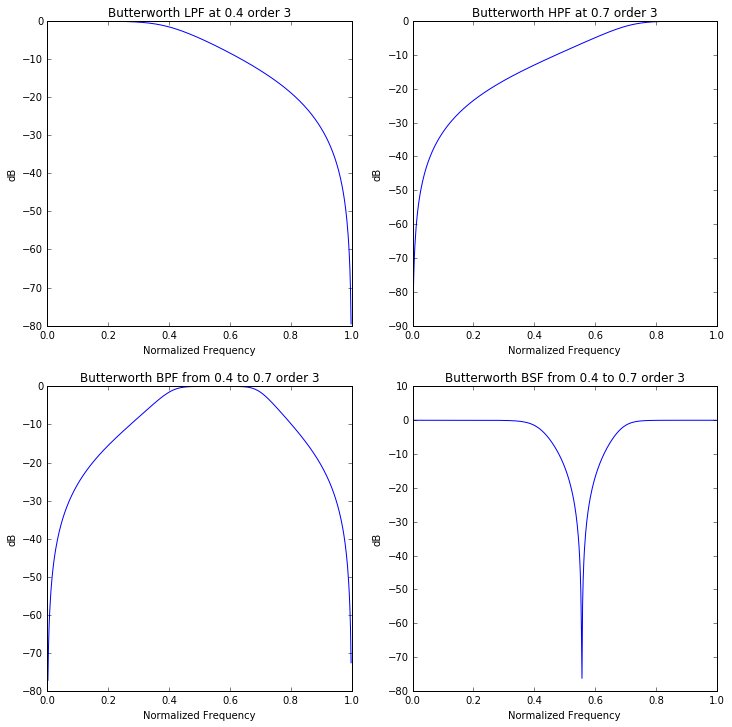

In [3]:
#Butterworth!
filter_order = 3
w_cutoff = 0.4
w_pass = 0.7

#lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
butt_b1, butt_a1 = signal.butter(filter_order, w_cutoff, btype='lowpass')
butt_w1, butt_h1 = signal.freqz(butt_b1, butt_a1)

butt_b2, butt_a2 = signal.butter(filter_order, w_pass, btype='highpass')
butt_w2, butt_h2 = signal.freqz(butt_b2, butt_a2)

butt_b3, butt_a3 = signal.butter(filter_order, [w_cutoff, w_pass], btype='bandpass')
butt_w3, butt_h3 = signal.freqz(butt_b3, butt_a3)

butt_b4, butt_a4 = signal.butter(filter_order, [w_cutoff, w_pass], btype='bandstop')
butt_w4, butt_h4 = signal.freqz(butt_b4, butt_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Butterworth LPF at 0.4 order 3')
plt.plot(butt_w1/np.pi, 10*np.log10(np.abs(butt_h1)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Butterworth HPF at 0.7 order 3')
plt.plot(butt_w2/np.pi, 10*np.log10(np.abs(butt_h2)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Butterworth BPF from 0.4 to 0.7 order 3')
plt.plot(butt_w3/np.pi, 10*np.log10(np.abs(butt_h3)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Butterworth BSF from 0.4 to 0.7 order 3')
plt.plot(butt_w4/np.pi, 10*np.log10(np.abs(butt_h4)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10


(<matplotlib.text.Text object at 0x7f94a2256fd0>, <matplotlib.text.Text object at 0x7f94a2256310>)

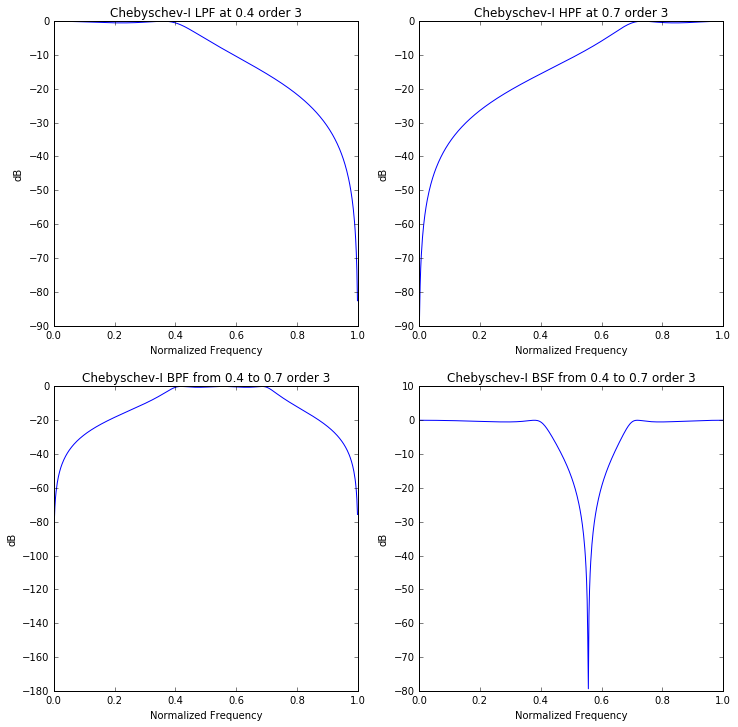

In [4]:
#Chebyschev!
filter_order = 3
w_cutoff = 0.4
w_pass = 0.7
max_ripple_db = 1.0

#lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
cheb_b1, cheb_a1 = signal.cheby1(filter_order, max_ripple_db, w_cutoff, btype='lowpass')
cheb_w1, cheb_h1 = signal.freqz(cheb_b1, cheb_a1)

cheb_b2, cheb_a2 = signal.cheby1(filter_order, max_ripple_db, w_pass, btype='highpass')
cheb_w2, cheb_h2 = signal.freqz(cheb_b2, cheb_a2)

cheb_b3, cheb_a3 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandpass')
cheb_w3, cheb_h3 = signal.freqz(cheb_b3, cheb_a3)

cheb_b4, cheb_a4 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandstop')
cheb_w4, cheb_h4 = signal.freqz(cheb_b4, cheb_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF at 0.4 order 3')
plt.plot(cheb_w1/np.pi, 10*np.log10(np.abs(cheb_h1)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I HPF at 0.7 order 3')
plt.plot(cheb_w2/np.pi, 10*np.log10(np.abs(cheb_h2)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I BPF from 0.4 to 0.7 order 3')
plt.plot(cheb_w3/np.pi, 10*np.log10(np.abs(cheb_h3)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I BSF from 0.4 to 0.7 order 3')
plt.plot(cheb_w4/np.pi, 10*np.log10(np.abs(cheb_h4)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

**1.2**

(<matplotlib.text.Text object at 0x7f94a1e44b90>, <matplotlib.text.Text object at 0x7f94a1e38bd0>)

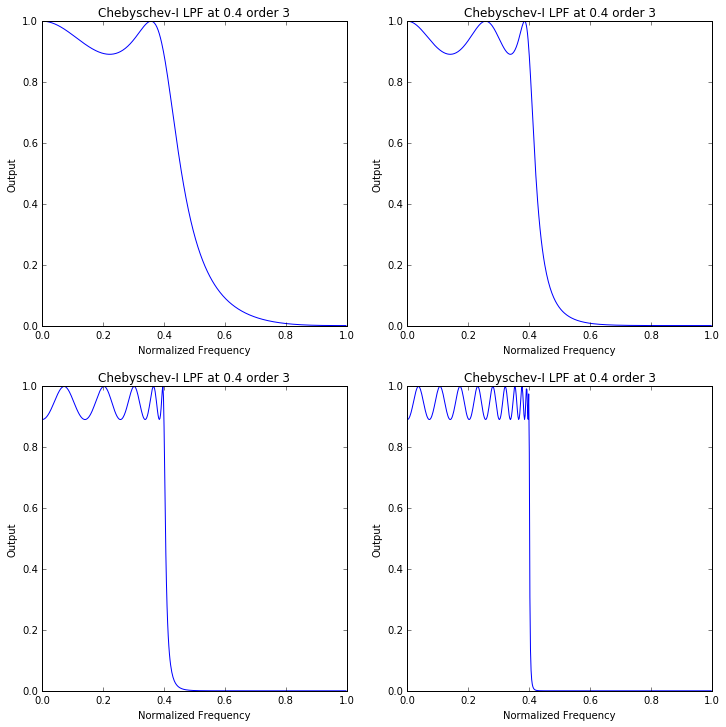

In [5]:
#Chebyschev!
filter_order = [3, 5, 10, 20]
w_cutoff = 0.4
w_pass = 0.7
max_ripple_db = 1.0

#lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
cheb_b1, cheb_a1 = signal.cheby1(filter_order[0], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w1, cheb_h1 = signal.freqz(cheb_b1, cheb_a1)

cheb_b2, cheb_a2 = signal.cheby1(filter_order[1], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w2, cheb_h2 = signal.freqz(cheb_b2, cheb_a2)

cheb_b3, cheb_a3 = signal.cheby1(filter_order[2], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w3, cheb_h3 = signal.freqz(cheb_b3, cheb_a3)

cheb_b4, cheb_a4 = signal.cheby1(filter_order[3], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w4, cheb_h4 = signal.freqz(cheb_b4, cheb_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF at 0.4 order ' + str(filter_order[0]))
plt.plot(cheb_w1/np.pi, np.abs(cheb_h1))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I LPF at 0.4 order ' + str(filter_order[0]))
plt.plot(cheb_w2/np.pi, np.abs(cheb_h2))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I LPF at 0.4 order ' + str(filter_order[0]))
plt.plot(cheb_w3/np.pi, np.abs(cheb_h3))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I LPF at 0.4 order ' + str(filter_order[0]))
plt.plot(cheb_w4/np.pi, np.abs(cheb_h4))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

## Recursive filter 

**2.1**

<Container object of 3 artists>

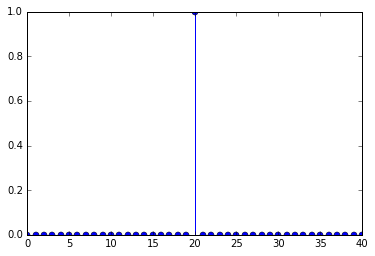

In [10]:
x_dirac = dirac(20, 41)
plt.stem(x_dirac)

**2.2**

<Container object of 3 artists>

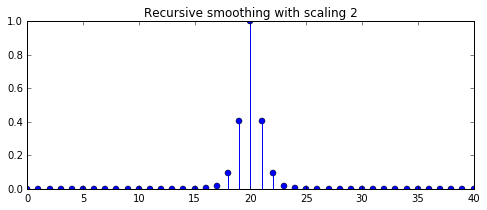

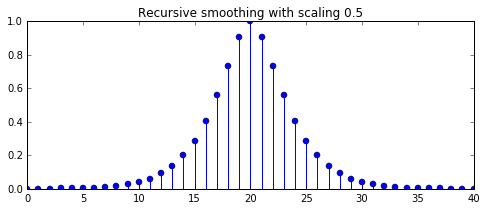

In [12]:
def derivativeRecursive(x, scaling=0.5, Ts=1):
    #Normalize scaling to Ts
    scaling = scaling/Ts
    
    #first we pad x with 1 zero on the front and two on the back
    x = np.pad(x, [2, 2], 'constant')
    
    #Derivative recursive filter
    alpha = scaling*Ts
    a = np.exp(-alpha)

    y_causal = np.zeros(x.shape)
    for k in range(2,x.size):
        y_causal[k] = -scaling*a*alpha*x[k-1] + 2*a*y_causal[k-1] - a*a*y_causal[k-2]
    
    y_anticausal = np.zeros(x.shape)
    for k in range(x.size-3, -1, -1):
        y_anticausal[k] = scaling*a*alpha*x[k+1] + 2*a*y_anticausal[k+1] - a*a*y_anticausal[k+2]
    
    y = y_causal + y_anticausal

    #Remove padding and return
    return y[2:-2]

def smoothingRecursive(x, scaling=0.5, Ts=1):
    #Normalize scaling to Ts
    scaling = scaling/Ts
    
    #first we pad x with 1 zero on the front and two on the back
    x = np.pad(x, [2, 2], 'constant')
    
    #Smoothing recursive filter
    alpha = scaling*Ts
    a = np.exp(-alpha)

    y_causal = np.zeros(x.shape)
    for k in range(2,x.size):
        y_causal[k] = x[k] + a*(alpha - 1)*x[k-1] + 2*a*y_causal[k-1] - a*a*y_causal[k-2]
    
    y_anticausal = np.zeros(x.shape)
    for k in range(x.size-3, -1, -1):
        y_anticausal[k] = a*(alpha + 1)*x[k+1] - a*a*x[k+2] + 2*a*y_anticausal[k+1] - a*a*y_anticausal[k+2]
    
    y = y_causal + y_anticausal

    #Remove padding and return
    return y[2:-2]

plt.figure(figsize=(8,3))
plt.title('Recursive smoothing with scaling 2')
plt.stem(smoothingRecursive(x_dirac, scaling=2, Ts=1./41))

plt.figure(figsize=(8,3))
plt.title('Recursive smoothing with scaling 0.5')
plt.stem(smoothingRecursive(x_dirac, scaling=0.5, Ts=1./41))

**2.3**

<Container object of 3 artists>

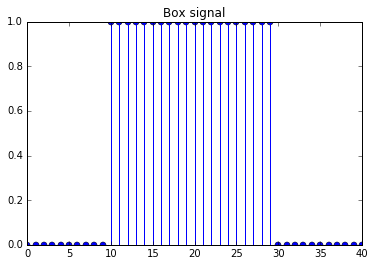

In [13]:
x_box = step(10, 41) - step(30, 41)

plt.title('Box signal')
plt.stem(x_box)

**2.4**

<Container object of 3 artists>

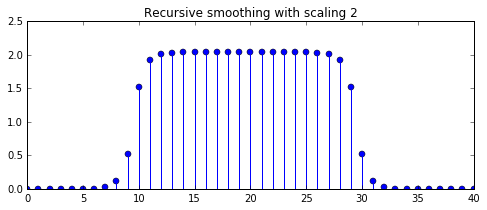

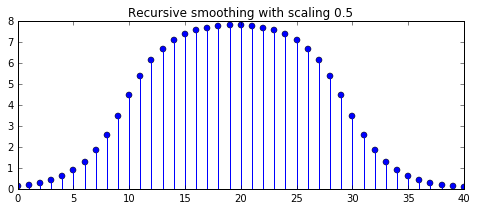

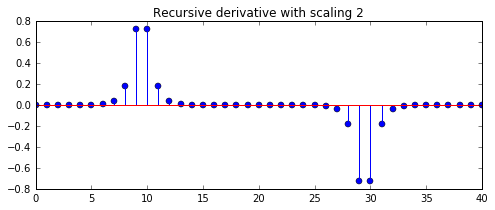

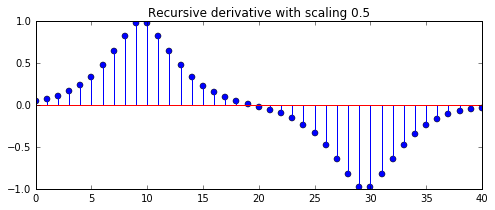

In [14]:
plt.figure(figsize=(8,3))
plt.title('Recursive smoothing with scaling 2')
plt.stem(smoothingRecursive(x_box, scaling=2, Ts=1))

plt.figure(figsize=(8,3))
plt.title('Recursive smoothing with scaling 0.5')
plt.stem(smoothingRecursive(x_box, scaling=0.5, Ts=1))

plt.figure(figsize=(8,3))
plt.title('Recursive derivative with scaling 2')
plt.stem(derivativeRecursive(x_box, scaling=2, Ts=1))

plt.figure(figsize=(8,3))
plt.title('Recursive derivative with scaling 0.5')
plt.stem(derivativeRecursive(x_box, scaling=0.5, Ts=1))

**3.1**

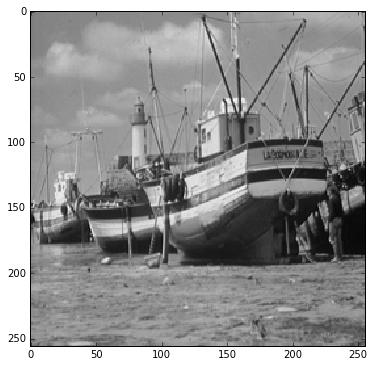

In [15]:
image = img_as_float(io.imread('../images/boat.256.gif', as_grey=True))
plt.figure(figsize=(6,6))
io.imshow(image)

**3.2** , **3.3**

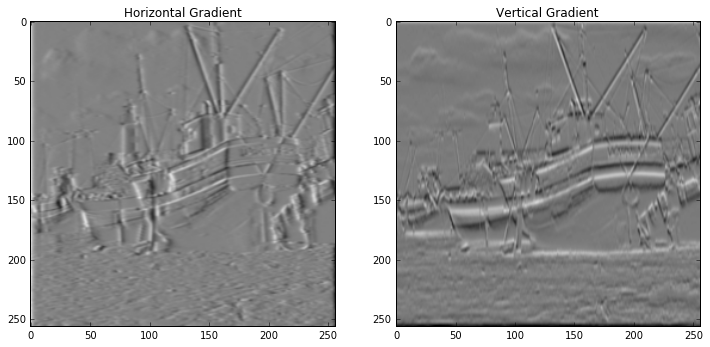

In [16]:
scaling_smoothing = 1.5
scaling_derivative = 1.5

#Apply smoothing filter in rows
image_hor_smoothed = np.zeros(image.shape) 
for row in range(image.shape[0]):
    image_hor_smoothed[row, :] = smoothingRecursive(image[row,:], scaling=scaling_smoothing)
    
#Apply derivative filter to get horizontal gradient
image_hor_grad = np.zeros(image.shape) 
for row in range(image.shape[0]):
    image_hor_grad[row, :] = derivativeRecursive(image_hor_smoothed[row,:], scaling=scaling_derivative)
    
#Apply smoothing filter in cols
image_vert_smoothed = np.zeros(image.shape) 
for col in range(image.shape[1]):
    image_vert_smoothed[:, col] = smoothingRecursive(image[:, col], scaling=scaling_smoothing)
    
#Apply derivative filter to get vertical gradient
image_vert_grad = np.zeros(image.shape) 
for col in range(image.shape[1]):
    image_vert_grad[:, col] = derivativeRecursive(image_vert_smoothed[:,col], scaling=scaling_derivative)
    
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image_hor_grad, cmap='gray')
plt.title('Horizontal Gradient')
plt.subplot(1,2,2)
plt.imshow(image_vert_grad, cmap='gray')
plt.title('Vertical Gradient')

**3.4**

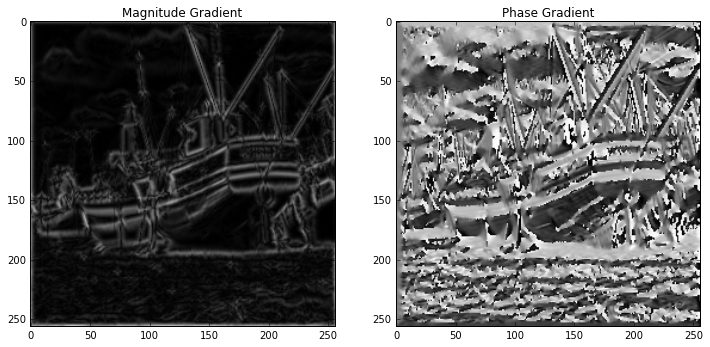

In [17]:
#Compute gradient magnitude and phase
image_grad_mag = np.sqrt(np.square(image_hor_grad) + np.square(image_vert_grad))
image_grad_phase = np.arctan2(image_vert_grad, image_hor_grad)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image_grad_mag, cmap='gray')
plt.title('Magnitude Gradient')
plt.subplot(1,2,2)
plt.imshow(image_grad_phase, cmap='gray')
plt.title('Phase Gradient')